In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/15826.jpg  
  inflating: seg_train/mountain/15835.jpg  
  inflating: seg_train/mountain/15872.jpg  
  inflating: seg_train/mountain/15899.jpg  
  inflating: seg_train/mountain/15971.jpg  
  inflating: seg_train/mountain/15978.jpg  
  inflating: seg_train/mountain/15991.jpg  
  inflating: seg_train/mountain/1600.jpg  
  inflating: seg_train/mountain/16009.jpg  
  inflating: seg_train/mountain/16037.jpg  
  inflating: seg_train/mountain/16312.jpg  
  inflating: seg_train/mountain/16354.jpg  
  inflating: seg_train/mountain/16356.jpg  
  inflating: seg_train/mountain/16358.jpg  
  inflating: seg_train/mountain/16388.jpg  
  inflating: seg_train/mountain/16417.jpg  
  inflating: seg_train/mountain/1642.jpg  
  inflating: seg_train/mountain/16435.jpg  
  inflating: seg_train/mountain/16438.jpg  
  inflating: seg_train/mountain/16439.jpg  
  inflating: seg_train/mountain/1645.jpg  
  inflating: seg_train/mount

In [3]:
import torchvision.transforms as t
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader

In [4]:
train = ImageFolder("/content/seg_train", transform = t.Compose([
    t.Resize((256,256)),
    t.CenterCrop(224),
    t.ToTensor(),
    t.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]))

In [5]:
train_loader = DataLoader(train, 64, shuffle=True)

In [6]:
batch = next(iter(train_loader))

In [7]:
images=batch[0]
labels=batch[1]

In [8]:
print(f"Shape of image is :{images.shape}")
print(f"Shape of label is :{labels.shape}")

Shape of image is :torch.Size([64, 3, 224, 224])
Shape of label is :torch.Size([64])


labels : tensor([3, 2, 5, 4, 3, 2, 1, 4, 5, 3, 1, 2, 5, 4, 2, 3, 5, 2, 1, 2, 0, 4, 5, 0,
        2, 2, 1, 5, 0, 1, 0, 5, 0, 5, 2, 3, 3, 5, 5, 5, 5, 1, 1, 5, 4, 4, 5, 5,
        2, 5, 5, 5, 4, 0, 2, 3, 4, 3, 2, 2, 3, 3, 4, 5])


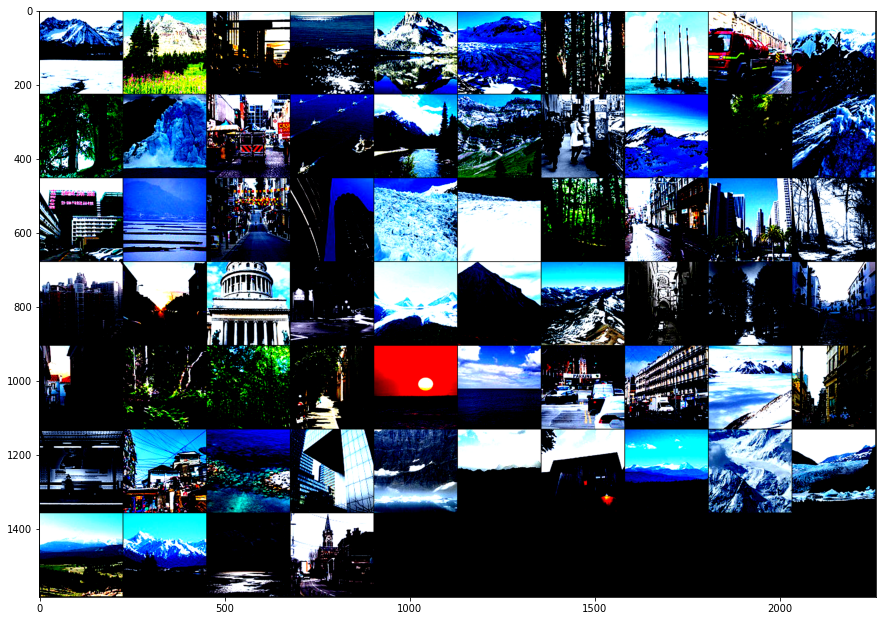

In [9]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"labels : {labels}")

In [10]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
'''class CustomNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 16, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(16,32, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(32, 64, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(16384,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,6)
        )
    
    def forward(self, xb):
        return self.network(xb)'''

In [11]:
class VGG16(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 6)
        )

    def forward(self, xb):
        return self.network(xb)


In [12]:
vgg= VGG16()
print(vgg)

VGG16(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [ ]:
#network = CustomNetwork()
#print(network)

CustomNetwork(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=16384, out_features=1024, bias=True)
    (10): ReLU()
    (11): Linear(in_features=1024, out_features=512, bias=True)
    (12): ReLU()
    (13): Linear(in_features=512, out_features=6, bias=True)
  )
)


In [ ]:
#network.cuda()

CustomNetwork(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=16384, out_features=1024, bias=True)
    (10): ReLU()
    (11): Linear(in_features=1024, out_features=512, bias=True)
    (12): ReLU()
    (13): Linear(in_features=512, out_features=6, bias=True)
  )
)

In [13]:
vgg.cuda()

VGG16(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [14]:
import torch
import torch.nn.functional as F

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [16]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0
    total_correct = 0
    for i, item in enumerate(train_loader):
        images = item[0].to(device)
        labels = item[1].to(device)

        preds = vgg(images)
        loss = F.cross_entropy(preds,labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_correct += get_num_correct(preds,labels)

    avg_loss = total_loss / len(train_loader)
    print("epoch:",epoch,"total_correct:",total_correct,"loss:",avg_loss)

epoch: 0 total_correct: 2391 loss: 295753541.9032108
epoch: 1 total_correct: 2512 loss: 29.300814801996406
epoch: 2 total_correct: 2469 loss: 13698.198470667818
epoch: 3 total_correct: 2501 loss: 1.7913444892926649
epoch: 4 total_correct: 2493 loss: 1.7925640187480234
epoch: 5 total_correct: 2474 loss: 1.7933878167109056
epoch: 6 total_correct: 2431 loss: 1.791529562256553
epoch: 7 total_correct: 2447 loss: 1.8031326781619679
epoch: 8 total_correct: 2473 loss: 1.7940536163069984
epoch: 9 total_correct: 2462 loss: 1.794700373844667
